In [ ]:
# import all libraries first

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns

%matplotlib inline




The first step is to read import data files. we also transpose the data and drop the unneccesary data labels
we want to scale the data files seperately to eliminate differences in scale between the datasets.

In [3]:
# loading dataset into Pandas DataFrame
df = pd.read_csv("All data unscaled.csv")
#                 , names=['Protein'+str(i) for i in range(0,3139)])
number_of_rows = (len(df.index))
df_transposed = df.T
df_transposed.columns = ['Protein'+str(i) for i in range(0,number_of_rows)]

#lets trim the first 39 columns as its all text descriptions about the data
df_trimmed = df_transposed.drop(df_transposed.index[0:38])

#lets replace any #na values with a 0 to avoid errors later
df_trimmed.fillna('0',inplace=True)

features = ['Protein'+str(i) for i in range(0,number_of_rows)]
x = df_trimmed.loc[:, features].values


x = StandardScaler().fit_transform(x)

indexNamesArr = df_trimmed.index.values
listOfRowIndexLabels = list(indexNamesArr)

scaled = pd.DataFrame(data = x, columns = features, index = listOfRowIndexLabels)

scaled.tail()

       

,Protein0,Protein1,Protein2,Protein3,Protein4,Protein5,Protein6,Protein7,Protein8,Protein9,...,Protein4034,Protein4035,Protein4036,Protein4037,Protein4038,Protein4039,Protein4040,Protein4041,Protein4042,Protein4043
26D,-1.044495,-0.394473,-0.29641,-0.280089,0.276300,-0.928289,-0.953698,-0.390243,-1.192100,-0.952964,...,-0.309714,-0.435378,-0.493468,-0.295755,-0.452315,-0.338864,-0.486163,-0.439429,-0.425012,-0.452633
27A,0.626106,-0.394473,-0.29641,-0.296023,-0.993968,-1.054551,-0.733032,-0.649034,-1.179212,-0.976180,...,-0.309714,-0.435378,-0.493468,-0.295755,-0.452315,-0.338864,-0.486163,-0.439429,-0.425012,-0.452633
27B,0.649809,-0.394473,-0.29641,-0.331697,-0.787109,-2.415058,-0.966249,-0.828610,-1.228323,-1.508255,...,-0.309714,-0.435378,-0.493468,-0.295755,-0.452315,-0.338864,-0.486163,-0.439429,-0.425012,-0.452633
27C,0.583131,-0.394473,-0.29641,-0.280113,-1.029085,-1.276922,-0.969620,-0.674132,-1.189754,-0.898381,...,-0.309714,-0.435378,-0.493468,-0.295755,-0.452315,-0.338864,-0.486163,-0.439429,-0.425012,-0.452633
27D,0.627326,-0.394473,-0.29641,-0.290639,-1.035533,-1.131081,-0.716412,-0.601308,-1.187851,-0.939949,...,-0.309714,-0.435378,-0.493468,-0.295755,-0.452315,-0.338864,-0.486163,-0.439429,-0.425012,-0.452633


ensure we have eliminated nan values in excel

we need to transpose the data back again to allow the grouping step to work we then re-add the data labels

the standard deviation of the proteins are not all equal so the resulting impact of each protein on the PCA plot 
is a combination of its loading value and its inherent variance. when looking at all samples we can use Standard deviation


So now we want to find which proteins are mainly responsible for each principle component (1 & 2) 
those which cause the greatest separation between the data points will be those with the highest "PCA loading x StandDev"
Lets find this number for every protein and then rank them! I'll call it the "Separation factor"
After that we can rank them and pick out the top ~10 to look at

In [329]:
#insert code for loading x stdev

now lets do a similar thing but use LDA this will allow us to target each variable condition and find what proteins make that condition unique

In [47]:
#insert condition of interest HERE!!!!!!!!!!!!
condition_or_interest = 'H2 loD', ''
#which conditions (if any) are we ignoring. if none type "nothing"
conditions_to_ignore = "O2 mD", 'H2 mD'

#lets extract the data labels and make them what we want to look at!
label_data = scaled
label_data['Reactor_run'] = label_data.index

#great, now lets ditch all the data except for the labels
a= "1"
b= "2"


label_data['Reactor_run']=label_data['Reactor_run'].map(lambda x: x.rstrip('aAbBcCdD'))
label_data['Reactor_run']=label_data['Reactor_run'].astype(int)
label_data['condition'] = label_data['Reactor_run'].map({
    1: "H2 loD",
    2: "O2 loD",
    3: "CO2 loD",
    4: "NH4 loD",
    5: "H2 vhD",
    6: "O2 vhD",
    7: "CO2 vhD",
    8: "NH4 vhD",
    9:"H2 loD",
    10: "O2 loD",
    11: "CO2 loD",
    12: "NH4 loD",
    13: "H2 vhD",
    14: "O2 vhD",
    15: "CO2 vhD",
    16: "NH4 vhD",
    17: "pilot",
    18: "O2 mD",
    19: "H2 mD",
    20: "O2 mD",
    21: "H2 mD",
    22: "O2 mD",
    23: "H2 mD",
    24: "H2 mD",
    25: "O2 mD",
    26: "O2 mD",
    27: "H2 mD" 
})

label_data = label_data[~label_data['condition'].isin(conditions_to_ignore)]

label_data['condition'] = np.where(label_data['condition'].isin(condition_or_interest), a, b)

label_data.to_csv("verify_regulation.csv")

#great, now lets ditch all the data except for the labels
label_data_only = label_data.iloc[:,4045:4046]
label_data.head()


<ipython-input-47-112b1c3771f5>:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  label_data['condition'] = np.where(label_data['condition'].isin(condition_or_interest), a, b)


,Protein0,Protein1,Protein2,Protein3,Protein4,Protein5,Protein6,Protein7,Protein8,Protein9,...,Protein4036,Protein4037,Protein4038,Protein4039,Protein4040,Protein4041,Protein4042,Protein4043,Reactor_run,condition
1A,3.324912,-0.394473,-0.29641,-0.248876,-0.815523,-0.812873,0.620635,-0.588779,-0.590108,-0.612903,...,-0.493468,-0.295755,-0.452315,-0.338864,-0.486163,-0.439429,-0.425012,-0.452633,1,1
1B,3.218370,-0.394473,-0.29641,-0.236703,-0.871885,-0.758933,0.625967,-0.742736,-0.587647,-0.531528,...,-0.493468,-0.295755,-0.452315,-0.338864,-0.486163,-0.439429,-0.425012,-0.452633,1,1
1C,3.699568,-0.394473,-0.29641,-0.245285,-0.847147,-0.716691,0.535035,-0.710899,-0.575399,-0.511342,...,-0.493468,-0.295755,-0.452315,-0.338864,-0.486163,-0.439429,-0.425012,-0.452633,1,1
1D,3.265336,-0.394473,-0.29641,-0.272347,-0.946454,-0.588247,0.962017,-0.744597,-0.601435,-0.591201,...,-0.493468,-0.295755,-0.452315,-0.338864,-0.486163,-0.439429,-0.425012,-0.452633,1,1
2A,-0.863026,-0.394473,-0.29641,-0.200285,2.057933,0.248127,0.697956,-0.492194,-0.485504,-0.602843,...,-0.493468,-0.295755,-0.452315,-0.338864,-0.486163,-0.439429,-0.425012,-0.452633,2,2


In [11]:
#lets try to perform MANOVA which relies on F-test to calculate the 
#ratio of "variance within our target groups" : "variance between our groups"
#This might be easiest to just code manually so we can see what's happening
#first we need to calculate the variance within a specified group
#calculate the sum square totals


In [12]:
from scipy.stats import f_oneway

In [13]:
#lets pull out all our identifiers from our original table

identi = df.iloc[:,4:5]
identi2 = df.iloc[:,2:3]
identi = identi.values
identi = identi.tolist()
identi2 = identi2.values
identi2 = identi2.tolist()

#for plotting where these proteins fall on the chromosomes, lets get their location details
chromosome = df.iloc[:,26:27]
chromosome = chromosome.values
chromosome = chromosome.tolist()

location = df.iloc[:,27:28]
location = location.values
location = location.tolist()

COGprocess = df.iloc[:,17:18]
COGprocess = COGprocess.values
COGprocess = COGprocess.tolist()



In [48]:
from scipy.stats import f_oneway
import pandas as pd

feature_columns = label_data.columns[:-2]  # Exclude the last 2 rows 
category_column = 'condition'
# Separate the DataFrame into the groups. add more groups as required
df_1 = label_data[label_data[category_column] == '1'][feature_columns]
df_2 = label_data[label_data[category_column] == '2'][feature_columns]

# Assuming you have DataFrames named 'df_1' and 'df_2'
feature_columns = label_data.columns[:-2]

# Initialize empty lists to store F-statistic and p-value for each feature
ftest_values = []
pvalue_values = []
up_or_down = []



# Perform one-way ANOVA for each feature
for col in feature_columns:
    f_statistic, p_value = f_oneway(df_1[col], df_2[col])
    ftest_values.append(f_statistic)
    pvalue_values.append(p_value)
    
#to determine if these proteins are up or downregulated we can see if the mean of proteins in group 1 is higher than that in group 2
    
    if abs(df_1[col].mean())/abs(df_2[col].mean()) > 1:
        up_or_down.append('up')
    else:
        up_or_down.append('down')


    
#Create a DataFrame for F-statistic and p-value
ftest_results = pd.DataFrame({
    'Feature': feature_columns,
    'F-statistic': ftest_values,
    'p-value': pvalue_values,
    'function': identi,
    'label': identi2,
    'chromosome' : chromosome,
    'location': location,
    'COGprocess': COGprocess,
    'group one regulated': up_or_down
})



# Display the ANOVA results
#ftest_results.to_csv("ftest_results.csv")
ftest_results.head()

C:\Users\user\anaconda3\lib\site-packages\scipy\stats\stats.py:3641: F_onewayConstantInputWarning: Each of the input arrays is constant;the F statistic is not defined or infinite
  warnings.warn(F_onewayConstantInputWarning())


,Feature,F-statistic,p-value,function,label,chromosome,location,COGprocess,group one regulated
0,Protein0,138.079091,1.252926e-17,[Carbamoyltransferase HypF2],[HYPF2_CUPNH],[megaplasmid pHG1],[86804.0],"[Post-translational modification, protein turn...",up
1,Protein1,2.216719,1.414343e-01,[Urease accessory protein UreD],[URED_CUPNH],[1],[1178396.0],"[Post-translational modification, protein turn...",up
2,Protein2,1.343301,2.507589e-01,[Urease subunit gamma],[URE3_CUPNH],[1],[1179310.0],[Amino acid transport and metabolism],up
3,Protein3,1.029239,3.141577e-01,[Urease accessory protein UreE],[UREE_CUPNH],[1],[1182340.0],"[Post-translational modification, protein turn...",down
4,Protein4,9.572718,2.926999e-03,[Oxygen-independent coproporphyrinogen III oxi...,[HEMN_CUPNH],[1],[3884434.0],[Coenzyme transport and metabolism],up


In [49]:
Threshold_pvalue = 0.05

ftest_sorted = ftest_results.sort_values(by='location', axis = 0, ascending=True)
filtered_df = ftest_sorted.loc[ftest_sorted['p-value'] <= Threshold_pvalue]
filtered_df.head()

,Feature,F-statistic,p-value,function,label,chromosome,location,COGprocess,group one regulated
1334,Protein1334,5.337172,2.411069e-02,[Elongation factor Tu],[EFTU_CUPNH],[0],[0.0],"[Translation, ribosomal structure and biogenesis]",down
348,Protein348,21.700270,1.659921e-05,[Uncharacterized protein],[Q0JZM4_CUPNH],[0],[0.0],[nan],up
432,Protein432,43.865272,8.490749e-09,[Putative transcriptional regulator],[Q0K0C0_CUPNH;Q0KAY5_CUPNH],[0],[0.0],[nan],up
433,Protein433,25.878989,3.413480e-06,[Acetyl-CoA acetyltransferase],[Q0K0C1_CUPNH],[0],[0.0],[Lipid transport and metabolism],up
434,Protein434,32.759369,2.991377e-07,[Predicted acyl dehydratase],[Q0K0C2_CUPNH],[0],[0.0],[Lipid transport and metabolism],up


In [50]:
#lets group these values by the chromosome they're on so we can plot each one seperately
filtered_df1 = filtered_df.copy()
filtered_df1 = filtered_df1.dropna()
filtered_df1['chromosome'] = filtered_df1['chromosome'].apply(lambda x: x[0] if isinstance(x, (list, np.ndarray)) else x)
filtered_df1['location'] = filtered_df1['location'].apply(lambda x: x[0] if isinstance(x, (list, np.ndarray)) else x)

chromosome_groups = filtered_df1.groupby("chromosome")


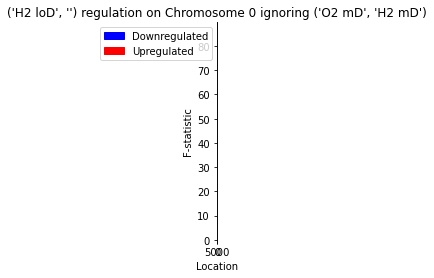

<Figure size 432x288 with 0 Axes>

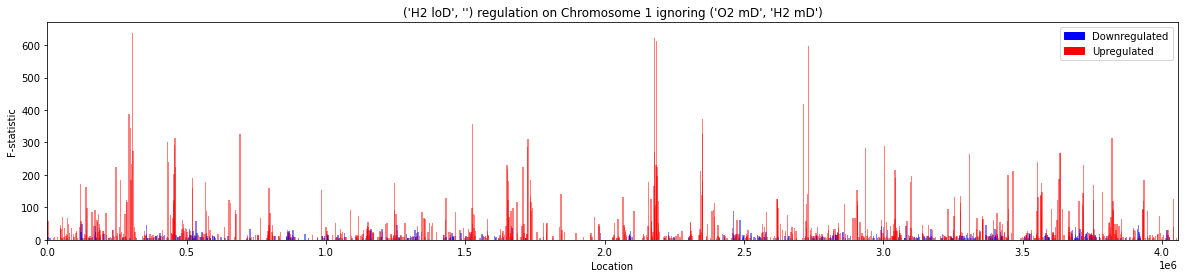

<Figure size 432x288 with 0 Axes>

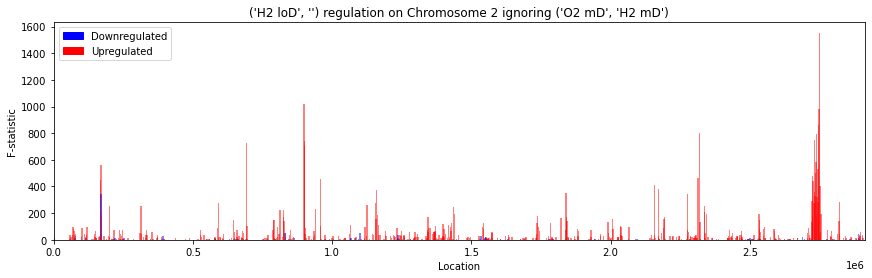

<Figure size 432x288 with 0 Axes>

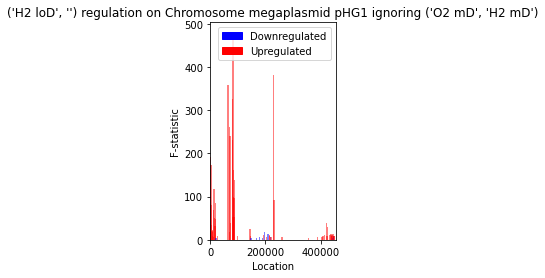

<Figure size 432x288 with 0 Axes>

In [62]:
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

bar_width =5000
for group, group_data in chromosome_groups:
    
    #this scales the graph to the size of the chromosome;
    max_loc = group_data['location'].max()
    plt.figure(figsize=((max_loc/200000), 4))
    
    #i want the bars to be different colours if they're up or down regulated
    colors = ['blue' if value == 'down' else 'red' for value in group_data['group one regulated']]

    plt.bar(group_data['location'], group_data['F-statistic'], label=f'Chromosome {group}', color=colors, alpha=0.5, width=bar_width)
    legend_elements = [Patch(color='blue', label='Downregulated'),
                       Patch(color='red', label='Upregulated')]
    plt.legend(handles=legend_elements)

    plt.xlim(0,max(group_data['location'])+5000)
    plt.xlabel('Location')
    plt.ylabel('F-statistic')
    plt.title(f'{condition_or_interest} regulation on Chromosome {group} ignoring {conditions_to_ignore}')
    #plt.legend()
    plt.show()
    plt.savefig('chromosome'+(str(group))+'.png')    
#we see from the plots that there are some proteins not assigned to a chromosome showing as "chromosome 0"
#lets leave these for now, it's good to know if they're there.

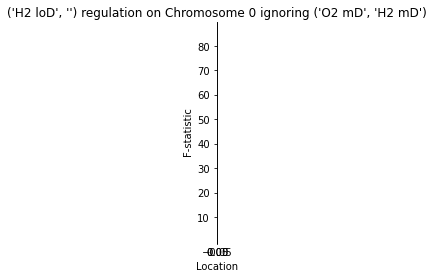

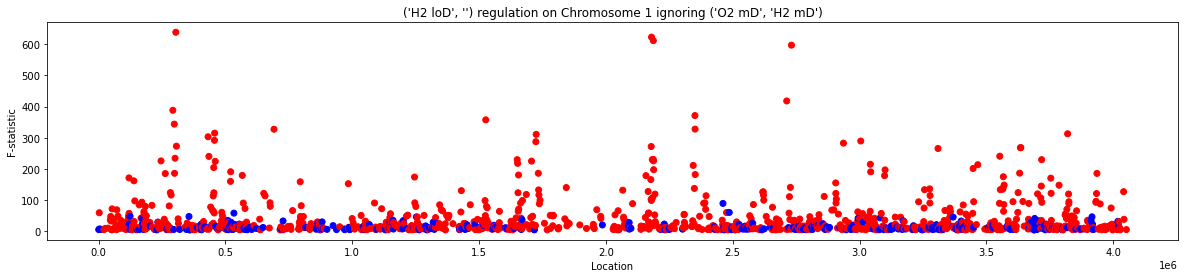

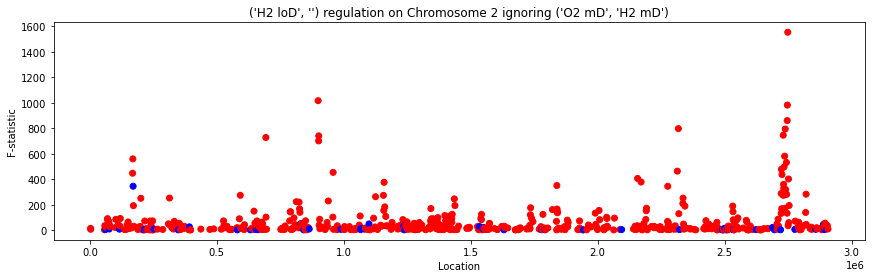

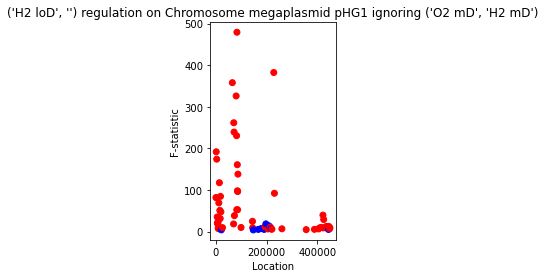

In [52]:

for group, group_data in chromosome_groups:
    max_loc = group_data['location'].max()
    plt.figure(figsize=((max_loc/200000), 4))
    colors = ['blue' if value == 'down' else 'red' for value in group_data['group one regulated']]

    plt.scatter(group_data['location'], group_data['F-statistic'],color =colors, label=f'Chromosome {group}')

    plt.xlabel('Location')
    plt.ylabel('F-statistic')
    plt.title(f'{condition_or_interest} regulation on Chromosome {group} ignoring {conditions_to_ignore}')
    #plt.legend()
    plt.show()

In [53]:
#Cool now lets group them by their cogprocess and count and average their significant f-values to see what their total differentials are
filtered_df2=filtered_df.copy()
filtered_df2['COGprocess'] = filtered_df2['COGprocess'].apply(str)
#somehow they all have square brackets so lets ditch those
filtered_df2['COGprocess'] = filtered_df2['COGprocess'].str.strip('[]')
filtered_df2 = filtered_df2[pd.to_numeric(filtered_df2['F-statistic'], errors='coerce').notnull()]

filtered_df2 = filtered_df2.dropna(subset=['F-statistic'])

CogGroups = filtered_df2.groupby('COGprocess')
mean_f_values = filtered_df2['F-statistic'].mean()

upregulated_count = 0
results =[]
#print(CogGroups['COGprocess'])
for category, data in CogGroups:

    averageFvalue = np.mean(data['F-statistic'])
    count = data.shape[0]
    upregulated_count += np.sum(data['group one regulated'] == 'up')
    #print(f'COGprocess: {category}, Average F-value: {averageFvalue}, Total Count: {count}, upregulated count: {upregulated_count}')
    
    results.append({
    'COGprocess': category,
    'Average F-value': averageFvalue,
    'Total Count': count,
    'Upregulated Count': upregulated_count
    })
    upregulated_count = 0
    

# Create a DataFrame from the results
results_df = pd.DataFrame(results)

# Save the DataFrame to a CSV file
#results_df.to_csv(f'{condition_or_interest} results.csv', index=False)

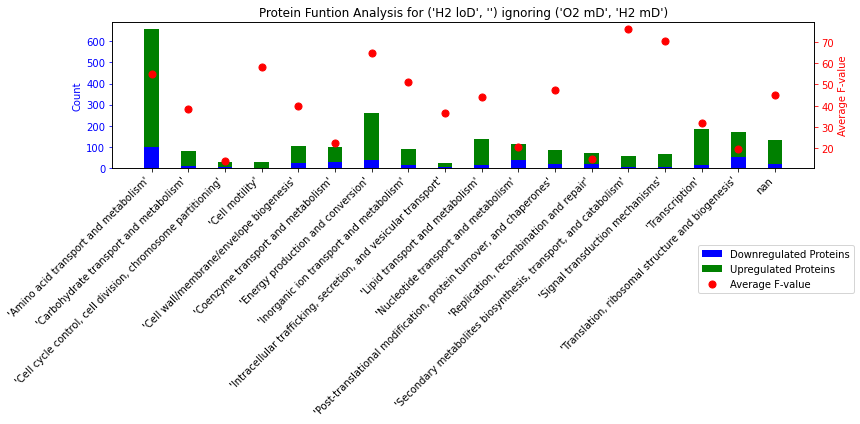

In [54]:
fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar chart for Total Count and Upregulated Count
bar_width = 0.4
#ax1.bar(results_df.index - bar_width/2, results_df['Total Count'], bar_width, label='Regulated Proteins', color='b')
#ax1.bar(results_df.index + bar_width/2, results_df['Upregulated Count'], bar_width, label='Upregulated Proteins', color='g')
ax1.bar(results_df['COGprocess'], results_df['Total Count'], bar_width, label='Downregulated Proteins', color='b')
ax1.bar(results_df['COGprocess'], results_df['Total Count'], bar_width, label='Upregulated Proteins', color='g', bottom=results_df['Total Count'] - results_df['Upregulated Count'])

ax1.set_ylabel('Count', color='b')
ax1.tick_params('y', colors='b')

# Secondary y-axis for Average F-value
ax2 = ax1.twinx()
ax2.scatter(results_df.index, results_df['Average F-value'], s=50, label='Average F-value', color='r')
ax2.set_ylabel('Average F-value', color='r')
ax2.tick_params('y', colors='r')

# X-axis labels with rotation
ax1.set_xticks(results_df.index)
ax1.set_xticklabels(results_df['COGprocess'], rotation=45, ha='right')

# Title and legend
plt.title(f'Protein Funtion Analysis for {condition_or_interest} ignoring {conditions_to_ignore}')
fig.tight_layout()
fig.legend(loc='lower right', bbox_to_anchor=(1.0, 0.3))
plt.savefig('ftest.png')

plt.show()

In [55]:
#from this plot we can see that there are a few categories that have consistently high f-values 
#and some that have many associated proteins

In [65]:
Threshold_pvalue = 0.05

ftest_sort = filtered_df.sort_values(by='F-statistic', axis = 0, ascending=False)
number_of_proteins = len(ftest_sort)
print(f'There are {number_of_proteins} regulated proteins under {condition_or_interest}')
ftest_sort.to_csv('proteins under '+(str(condition_or_interest))+".csv")
ftest_sort.head(15)

There are 1982 regulated proteins under ('H2 loD', '')


,Feature,F-statistic,p-value,function,label,chromosome,location,COGprocess,group one regulated
137,Protein137,1553.883824,1.309459e-46,[Uncharacterized protein],[Q0JYF8_CUPNH],[2],[2748949.0],[Amino acid transport and metabolism],up
829,Protein829,1017.328032,5.261497e-41,"[TRAP-type transporter, large permease component]",[Q0K340_CUPNH],[2],[898950.0],"[Secondary metabolites biosynthesis, transport...",up
138,Protein138,982.998327,1.478803e-40,[Uncharacterized protein],[Q0JYF9_CUPNH],[2],[2747374.0],[Amino acid transport and metabolism],up
139,Protein139,861.352128,7.729715e-39,[Uncharacterized protein],[Q0JYG0_CUPNH],[2],[2746789.0],[Amino acid transport and metabolism],up
323,Protein323,798.122169,7.463361e-38,[Cytochrome c oxidase subunit 1],[Q0JZI1_CUPNH],[2],[2318103.0],[Energy production and conversion],up
144,Protein144,795.341492,8.277248e-38,[Uncharacterized protein],[Q0JYG5_CUPNH],[2],[2738915.0],[Cell wall/membrane/envelope biogenesis],up
151,Protein151,746.745026,5.344527e-37,[Uncharacterized protein],[Q0JYH4_CUPNH],[2],[2731111.0],[Amino acid transport and metabolism],up
827,Protein827,741.408658,6.603961e-37,"[TRAP-type transporter, periplasmic component]",[Q0K338_CUPNH],[2],[901521.0],[Energy production and conversion],up
891,Protein891,728.710990,1.098855e-36,"[Response regulator, NarL-family]",[Q0K3K6_CUPNH],[2],[693060.0],[Transcription],up
828,Protein828,701.828849,3.319326e-36,"[TRAP-type transporter, small permease component]",[Q0K339_CUPNH],[2],[900866.0],"[Secondary metabolites biosynthesis, transport...",up
